### Oleksiy Anokhin (June 15, 2020)

**Workbook for UChicago COVID-19 Hackathon:**
https://voices.uchicago.edu/mscahackathon/

**GitHub Repository:**
https://github.com/OleksiyAnokhin/UChicago-COVID-Hackathon

**Data source:** 
https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew

**How this dataset was created:**
https://digital.chicago.gov/index.php/chicago-taxi-data-released/

In [81]:
# Install libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas import concat

In [2]:
# Read dataset for December 2019 - June 2020
path = 'C:/Users/oleks/Documents/Projects/UChicago-COVID-Hackathon/Taxi_Trips_Dec2019-Present.csv'
print(path)

C:/Users/oleks/Documents/Projects/UChicago-COVID-Hackathon/Taxi_Trips_Dec2019-Present.csv


In [3]:
# Read csv for December 2019 - June 2020
taxi_2020 = pd.read_csv(path, encoding = 'ISO-8859-1')
taxi_2020.head()

C:\Users\oleks\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,e4c06ccfb0d1de5db8675fb3a2779b209760d6ac,bbf91e67201de7487dbeb23021a9a741e36d8d65175def...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,600.0,0.1,1.703184e+10,1.703108e+10,32.0,8.0,...,0.0,10.50,Credit Card,Taxi Affiliation Services,41.881,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
1,e1de111c0c25003054c31e0e49e9f64cc00a8683,b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...,12/01/2019 12:15:00 AM,12/01/2019 12:15:00 AM,180.0,0.0,NaN,NaN,7.0,6.0,...,0.0,7.00,Credit Card,Taxi Affiliation Services,41.9227,-87.649489,POINT (-87.6494887289 41.9226862843),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
2,e0ed81be1b41bda25285afeeb76d4e4fb4be30fc,53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,380.0,1.2,NaN,NaN,14.0,16.0,...,1.0,7.25,Cash,Flash Cab,41.9681,-87.721559,POINT (-87.7215590627 41.968069),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
3,e077d949ef075542a5168b48f9d09bd9320fd2d6,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,780.0,2.0,1.703184e+10,1.703108e+10,32.0,8.0,...,2.0,13.60,Credit Card,Taxi Affiliation Services,41.881,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
4,dfeeafe19f4fe8d71f5eadb6919b0f2fca99ee62,71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,720.0,3.1,1.703128e+10,1.703107e+10,28.0,7.0,...,1.0,12.50,Cash,Taxi Affiliation Services,41.8793,-87.642649,POINT (-87.642648998 41.8792550844),41.922083,-87.634156,POINT (-87.6341560931 41.922082541)


In [4]:
# Check the dataframe info
taxi_2020.info()
# In total we have 4137294 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137294 entries, 0 to 4137293
Data columns (total 23 columns):
Trip ID                       object
Taxi ID                       object
Trip Start Timestamp          object
Trip End Timestamp            object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                  object
Company                       object
Pickup Centroid Latitude      object
Pickup Centroid Longitude     float64
Pickup Centroid Location      object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location    object
dtypes: float64(14), o

In [5]:
# Check duplicates in column Taxi ID
taxi_2020['Taxi ID'].duplicated().any()

True

In [6]:
# Check unique values with nunique()
taxi_2020['Taxi ID'].nunique()

4641

In [7]:
# Check unique values with count()
taxi_2020['Taxi ID'].count()

4137026

In [8]:
# I will keep Taxi ID column, but will drop Ride ID column
taxi_2020 = taxi_2020.drop('Trip ID', 1)

In [9]:
# Check structure
taxi_2020.head()
# As you can see below, now we have only 22 columns

,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,bbf91e67201de7487dbeb23021a9a741e36d8d65175def...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,600.0,0.1,1.703184e+10,1.703108e+10,32.0,8.0,8.75,...,0.0,10.50,Credit Card,Taxi Affiliation Services,41.881,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
1,b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...,12/01/2019 12:15:00 AM,12/01/2019 12:15:00 AM,180.0,0.0,NaN,NaN,7.0,6.0,5.00,...,0.0,7.00,Credit Card,Taxi Affiliation Services,41.9227,-87.649489,POINT (-87.6494887289 41.9226862843),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
2,53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,380.0,1.2,NaN,NaN,14.0,16.0,6.25,...,1.0,7.25,Cash,Flash Cab,41.9681,-87.721559,POINT (-87.7215590627 41.968069),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253)
3,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,780.0,2.0,1.703184e+10,1.703108e+10,32.0,8.0,9.25,...,2.0,13.60,Credit Card,Taxi Affiliation Services,41.881,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134)
4,71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...,12/01/2019 12:15:00 AM,12/01/2019 12:30:00 AM,720.0,3.1,1.703128e+10,1.703107e+10,28.0,7.0,11.50,...,1.0,12.50,Cash,Taxi Affiliation Services,41.8793,-87.642649,POINT (-87.642648998 41.8792550844),41.922083,-87.634156,POINT (-87.6341560931 41.922082541)


In [10]:
# Check column types
taxi_2020.dtypes

Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude       object
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

In [11]:
# Convert format and coerce errors for now
taxi_2020['Trip Start Timestamp'] = pd.to_datetime(taxi_2020['Trip Start Timestamp'], errors = 'coerce')
taxi_2020['Trip End Timestamp'] = pd.to_datetime(taxi_2020['Trip End Timestamp'], errors = 'coerce')
# This is a temporary solution and I think it can hurt in furure. Also, might be a good idea split data first

In [12]:
# Check data types again
taxi_2020.dtypes

Taxi ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude              object
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Centroid  Location            object
dtype: obj

In [13]:
# Split trip start and trip end columns
taxi_2020['Start Date'] = taxi_2020['Trip Start Timestamp'].dt.date
taxi_2020['Start Time'] = taxi_2020['Trip Start Timestamp'].dt.time
taxi_2020['End Date'] = taxi_2020['Trip End Timestamp'].dt.date
taxi_2020['End Time'] = taxi_2020['Trip End Timestamp'].dt.time

In [14]:
# Check data types again
taxi_2020.head()

,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Start Date,Start Time,End Date,End Time
0,bbf91e67201de7487dbeb23021a9a741e36d8d65175def...,2019-12-01 00:15:00,2019-12-01 00:30:00,600.0,0.1,1.703184e+10,1.703108e+10,32.0,8.0,8.75,...,41.881,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),2019-12-01,00:15:00,2019-12-01,00:30:00
1,b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...,2019-12-01 00:15:00,2019-12-01 00:15:00,180.0,0.0,NaN,NaN,7.0,6.0,5.00,...,41.9227,-87.649489,POINT (-87.6494887289 41.9226862843),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),2019-12-01,00:15:00,2019-12-01,00:15:00
2,53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...,2019-12-01 00:15:00,2019-12-01 00:30:00,380.0,1.2,NaN,NaN,14.0,16.0,6.25,...,41.9681,-87.721559,POINT (-87.7215590627 41.968069),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),2019-12-01,00:15:00,2019-12-01,00:30:00
3,ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...,2019-12-01 00:15:00,2019-12-01 00:30:00,780.0,2.0,1.703184e+10,1.703108e+10,32.0,8.0,9.25,...,41.881,-87.632746,POINT (-87.6327464887 41.8809944707),41.899156,-87.626211,POINT (-87.6262105324 41.8991556134),2019-12-01,00:15:00,2019-12-01,00:30:00
4,71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...,2019-12-01 00:15:00,2019-12-01 00:30:00,720.0,3.1,1.703128e+10,1.703107e+10,28.0,7.0,11.50,...,41.8793,-87.642649,POINT (-87.642648998 41.8792550844),41.922083,-87.634156,POINT (-87.6341560931 41.922082541),2019-12-01,00:15:00,2019-12-01,00:30:00


In [15]:
# Check data types again
taxi_2020.dtypes

Taxi ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude              object
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Centroid  Location            object
Start Date

In [16]:
# Convert start date and into datetime format
taxi_2020['Start Date'] = pd.to_datetime(taxi_2020['Start Date'])
taxi_2020['End Date'] = pd.to_datetime(taxi_2020['End Date'])

In [17]:
# Check data types again
taxi_2020.dtypes

Taxi ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude              object
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Centroid  Location            object
Start Date

### 1. Exploring the frequency of rides (total and by company before and after COVIF-19)

In [18]:
# Group rides by date and count
taxi_2020_by_day = taxi_2020['Start Date'].dt.date.value_counts().sort_index().reset_index()
taxi_2020_by_day.columns = ['Start Date', 'Count']

In [20]:
print(taxi_2020_by_day)

     Start Date  Count
0    2019-12-01  33571
1    2019-12-02  52913
2    2019-12-03  56998
3    2019-12-04  58126
4    2019-12-05  62134
..          ...    ...
179  2020-05-28   2721
180  2020-05-29   2844
181  2020-05-30   2394
182  2020-05-31   2438
183  2020-06-01     10

[184 rows x 2 columns]


In [21]:
# Rename start date column
taxi_2020_by_day = taxi_2020_by_day.rename(columns = {'Start Date': "Start_date"})

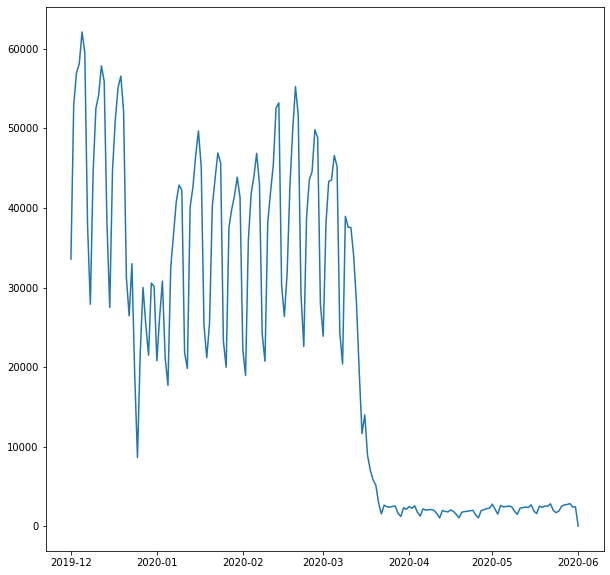

In [122]:
# Plot rides by day
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(taxi_2020_by_day.Start_date, taxi_2020_by_day.Count)
# plt.title('The taxi traffic in Chicago dropped significantly in the end of March 2020 due to COVID-19')
plt.show()

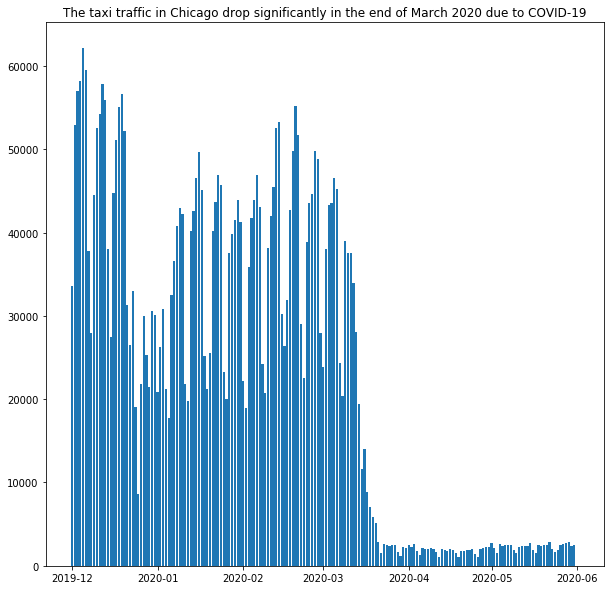

In [23]:
# The same data can be presented in the format of barchart
plt.bar(taxi_2020_by_day.Start_date, taxi_2020_by_day.Count)
plt.title('The taxi traffic in Chicago drop significantly in the end of March 2020 due to COVID-19')
plt.show()

In [24]:
# Now let's analyze how different companies were affected during this period of time
taxi_2020_by_day_company = taxi_2020.groupby(['Start Date', 'Company']).size().reset_index()
print(taxi_2020_by_day_company)

     Start Date                        Company    0
0    2019-12-01    1085 - 72312 N and W Cab Co    4
1    2019-12-01     2092 - 61288 Sbeih company    5
2    2019-12-01                  24 Seven Taxi  279
3    2019-12-01      3011 - 66308 JBL Cab Inc.    2
4    2019-12-01     3094 - 24059 G.L.B. Cab Co   11
...         ...                            ...  ...
6362 2020-05-31  Taxicab Insurance Agency, LLC   17
6363 2020-05-31            Top Cab Affiliation   70
6364 2020-05-31                      U Taxicab   33
6365 2020-06-01                      Flash Cab    6
6366 2020-06-01      Taxi Affiliation Services    4

[6367 rows x 3 columns]


In [25]:
# Rename column 0
taxi_2020_by_day_company = taxi_2020_by_day_company.rename(columns = {0 : 'Rides'})
print(taxi_2020_by_day_company)

     Start Date                        Company  Rides
0    2019-12-01    1085 - 72312 N and W Cab Co      4
1    2019-12-01     2092 - 61288 Sbeih company      5
2    2019-12-01                  24 Seven Taxi    279
3    2019-12-01      3011 - 66308 JBL Cab Inc.      2
4    2019-12-01     3094 - 24059 G.L.B. Cab Co     11
...         ...                            ...    ...
6362 2020-05-31  Taxicab Insurance Agency, LLC     17
6363 2020-05-31            Top Cab Affiliation     70
6364 2020-05-31                      U Taxicab     33
6365 2020-06-01                      Flash Cab      6
6366 2020-06-01      Taxi Affiliation Services      4

[6367 rows x 3 columns]


In [26]:
# Check all companies here
taxi_2020_by_day_company.Company.value_counts()
# Numbers here tell how many days companies were driving, not rides

Taxi Affiliation Services                       184
Flash Cab                                       184
Top Cab Affiliation                             183
Taxicab Insurance Agency, LLC                   183
Sun Taxi                                        183
Blue Ribbon Taxi Association Inc.               183
Choice Taxi Association                         183
Chicago Taxicab                                 183
Medallion Leasin                                183
Patriot Taxi Dba Peace Taxi Associat            183
Setare Inc                                      183
Star North Management LLC                       183
312 Medallion Management Corp                   183
Chicago Independents                            183
City Service                                    182
Suburban Dispatch LLC                           181
Chicago Medallion Management                    178
Metro Jet Taxi A                                174
Nova Taxi Affiliation Llc                       169
24 Seven Tax

In [27]:
# Calculate the number of companies
taxi_2020_by_day_company.Company.value_counts().count()
# As you can see, we have 50 companies

50

In [28]:
# Let's group by rides now to identify the most popular companies with the biggest amount of rides
taxi_2020_by_day_company_sum = taxi_2020_by_day_company.groupby('Company', as_index=False).agg({"Rides": "sum"}).sort_values('Rides', ascending = False)
print(taxi_2020_by_day_company)

     Start Date                        Company  Rides
0    2019-12-01    1085 - 72312 N and W Cab Co      4
1    2019-12-01     2092 - 61288 Sbeih company      5
2    2019-12-01                  24 Seven Taxi    279
3    2019-12-01      3011 - 66308 JBL Cab Inc.      2
4    2019-12-01     3094 - 24059 G.L.B. Cab Co     11
...         ...                            ...    ...
6362 2020-05-31  Taxicab Insurance Agency, LLC     17
6363 2020-05-31            Top Cab Affiliation     70
6364 2020-05-31                      U Taxicab     33
6365 2020-06-01                      Flash Cab      6
6366 2020-06-01      Taxi Affiliation Services      4

[6367 rows x 3 columns]


In [29]:
# As we can see, there are 10 companies, whih had more from 1 mln to 100000 rides.
# We need to subset these top 10 companies and identify patterns.
top_10_companies_by_day = taxi_2020_by_day_company.loc[taxi_2020_by_day_company['Company'].
                                                       isin(['Taxi Affiliation Services',
                                                             'Flash Cab',
                                                             'Chicago Carriage Cab Corp', 
                                                             'Sun Taxi',
                                                             'City Service', 
                                                             'Medallion Leasin',
                                                             'Star North Management LLC', 
                                                             'Blue Ribbon Taxi Association Inc.',
                                                             'Taxicab Insurance Agency, LLC',
                                                             'Choice Taxi Association'])]
print(top_10_companies_by_day)

     Start Date                            Company  Rides
18   2019-12-01  Blue Ribbon Taxi Association Inc.   1648
20   2019-12-01          Chicago Carriage Cab Corp   3276
24   2019-12-01            Choice Taxi Association   1011
25   2019-12-01                       City Service   2353
26   2019-12-01                          Flash Cab   5450
...         ...                                ...    ...
6360 2020-05-31                           Sun Taxi     60
6361 2020-05-31          Taxi Affiliation Services    834
6362 2020-05-31      Taxicab Insurance Agency, LLC     17
6365 2020-06-01                          Flash Cab      6
6366 2020-06-01          Taxi Affiliation Services      4

[1798 rows x 3 columns]


In [30]:
top_10_companies_by_day = top_10_companies_by_day.rename(columns = {'Start Date': "Start_date"})
print(top_10_companies_by_day)

     Start_date                            Company  Rides
18   2019-12-01  Blue Ribbon Taxi Association Inc.   1648
20   2019-12-01          Chicago Carriage Cab Corp   3276
24   2019-12-01            Choice Taxi Association   1011
25   2019-12-01                       City Service   2353
26   2019-12-01                          Flash Cab   5450
...         ...                                ...    ...
6360 2020-05-31                           Sun Taxi     60
6361 2020-05-31          Taxi Affiliation Services    834
6362 2020-05-31      Taxicab Insurance Agency, LLC     17
6365 2020-06-01                          Flash Cab      6
6366 2020-06-01          Taxi Affiliation Services      4

[1798 rows x 3 columns]


In [31]:
# Separate companies
flash_cab = top_10_companies_by_day.loc[taxi_2020_by_day_company['Company'].isin(['Flash Cab'])]
taxi_affiliation_services = top_10_companies_by_day.loc[taxi_2020_by_day_company['Company'].
                                                        isin(['Taxi Affiliation Services'])]
chicago_carriage_cab_corp = top_10_companies_by_day.loc[taxi_2020_by_day_company['Company'].isin(['Chicago Carriage Cab Corp'])]
sun_taxi = top_10_companies_by_day.loc[taxi_2020_by_day_company['Company'].isin(['Sun Taxi'])]
city_service = top_10_companies_by_day.loc[taxi_2020_by_day_company['Company'].isin(['City Service'])]

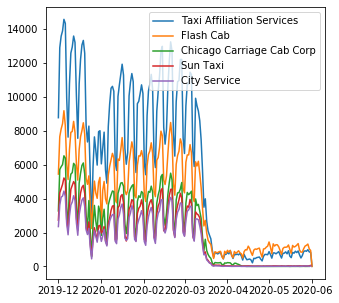

In [127]:
# Plot top 5 companies
plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(taxi_affiliation_services.Start_date, taxi_affiliation_services.Rides, label = 'Taxi Affiliation Services')
plt.plot(flash_cab.Start_date, flash_cab.Rides, label = 'Flash Cab')
plt.plot(chicago_carriage_cab_corp.Start_date, chicago_carriage_cab_corp.Rides, label = 'Chicago Carriage Cab Corp')
plt.plot(sun_taxi.Start_date, sun_taxi.Rides, label = 'Sun Taxi')
plt.plot(city_service.Start_date, city_service.Rides, label = 'City Service')
# plt.title('Top 5 taxi companies in Chicago faced a dramatic drop of traffic due to COVID-19')
plt.legend()
plt.show()
# The interesting point that Flash Cab became the most popular company since COVID started, 
# beating Chicago Affiliation Services, which previous had 40% market advantage. 
# It looks like Flash Cab anticrisis handles are a bit better. 

### 2. Exploring the changes in rides behavior (duration, hours, distance) before and After COVID-19

In [33]:
# Let's print the initial dataframe first
print(taxi_2020.head())

                                             Taxi ID Trip Start Timestamp  \
0  bbf91e67201de7487dbeb23021a9a741e36d8d65175def...  2019-12-01 00:15:00   
1  b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...  2019-12-01 00:15:00   
2  53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...  2019-12-01 00:15:00   
3  ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...  2019-12-01 00:15:00   
4  71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...  2019-12-01 00:15:00   

   Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0 2019-12-01 00:30:00         600.0         0.1         1.703184e+10   
1 2019-12-01 00:15:00         180.0         0.0                  NaN   
2 2019-12-01 00:30:00         380.0         1.2                  NaN   
3 2019-12-01 00:30:00         780.0         2.0         1.703184e+10   
4 2019-12-01 00:30:00         720.0         3.1         1.703128e+10   

   Dropoff Census Tract  Pickup Community Area  Dropoff Community Area   Fare  \
0          1.703108e+10

In [34]:
# And double check again the types of the columns
taxi_2020.dtypes
# As you can see, Start Date remains the datetime type.

Taxi ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude              object
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Centroid  Location            object
Start Date

In [35]:
# let's find if the duration of trips changed. Maybe clients started to use taxis for different purposes?
duration = taxi_2020[['Start Date','Trip Seconds']]
print(duration)

        Start Date  Trip Seconds
0       2019-12-01         600.0
1       2019-12-01         180.0
2       2019-12-01         380.0
3       2019-12-01         780.0
4       2019-12-01         720.0
...            ...           ...
4137289 2020-06-01        1080.0
4137290 2020-06-01          35.0
4137291 2020-06-01         556.0
4137292 2020-06-01         480.0
4137293 2020-06-01         300.0

[4137294 rows x 2 columns]


In [36]:
# Now let's group the infomation here
duration_by_day = duration.groupby('Start Date', as_index=False).agg({"Trip Seconds": "mean"})
print(duration_by_day)

    Start Date  Trip Seconds
0   2019-12-01   1024.181542
1   2019-12-02    892.024116
2   2019-12-03    844.335562
3   2019-12-04    923.672729
4   2019-12-05    978.543716
..         ...           ...
179 2020-05-28    970.165624
180 2020-05-29   1043.809222
181 2020-05-30   1171.479933
182 2020-05-31   1165.951500
183 2020-06-01    675.800000

[184 rows x 2 columns]


In [37]:
# As we can see, our trips are not rounded, let's do it
duration_by_day = duration_by_day.round()
print(duration_by_day)

    Start Date  Trip Seconds
0   2019-12-01        1024.0
1   2019-12-02         892.0
2   2019-12-03         844.0
3   2019-12-04         924.0
4   2019-12-05         979.0
..         ...           ...
179 2020-05-28         970.0
180 2020-05-29        1044.0
181 2020-05-30        1171.0
182 2020-05-31        1166.0
183 2020-06-01         676.0

[184 rows x 2 columns]


In [38]:
# Also let's rename the column names
duration_by_day = duration_by_day.rename(columns = {'Start Date': 'Start_date', 'Trip Seconds': 'Seconds'})
print(duration_by_day)

    Start_date  Seconds
0   2019-12-01   1024.0
1   2019-12-02    892.0
2   2019-12-03    844.0
3   2019-12-04    924.0
4   2019-12-05    979.0
..         ...      ...
179 2020-05-28    970.0
180 2020-05-29   1044.0
181 2020-05-30   1171.0
182 2020-05-31   1166.0
183 2020-06-01    676.0

[184 rows x 2 columns]


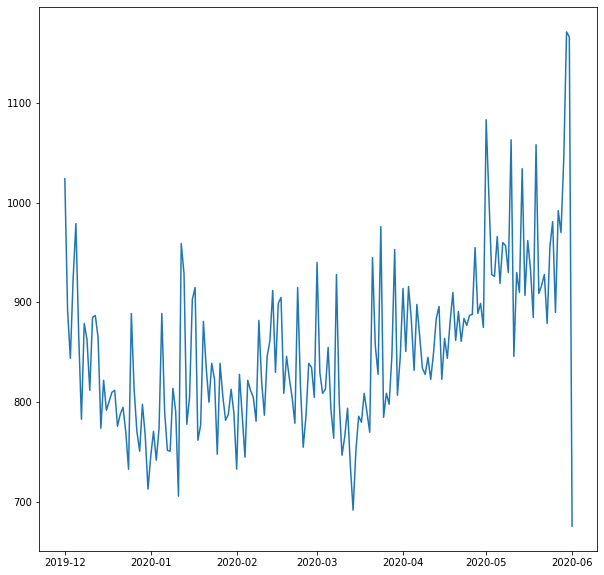

In [128]:
# Average duration of a trip by day
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(duration_by_day.Start_date, duration_by_day.Seconds)
# plt.title('The average duration of a taxi trip (in seconds) changed after COVID-19')
plt.show()
# As we can, see the behavior of customers changed. Now they make longer trips (also keep the lighter traffic in mind).
# The average trip in seconds increased approximately by 3 minutes (about 200 seconds. )

In [40]:
# Now we can test our hypothesis that the milleage of an average taxi trip increased.
mileage = taxi_2020[['Start Date','Trip Miles']]
print(mileage)

        Start Date  Trip Miles
0       2019-12-01        0.10
1       2019-12-01        0.00
2       2019-12-01        1.20
3       2019-12-01        2.00
4       2019-12-01        3.10
...            ...         ...
4137289 2020-06-01       14.00
4137290 2020-06-01        0.00
4137291 2020-06-01        0.55
4137292 2020-06-01        0.10
4137293 2020-06-01        0.00

[4137294 rows x 2 columns]


In [41]:
# Now let's group the infomation here
mileage_by_day = mileage.groupby('Start Date', as_index = False).agg({"Trip Miles": "mean"})
print(mileage_by_day)

    Start Date  Trip Miles
0   2019-12-01    5.208241
1   2019-12-02    3.845584
2   2019-12-03    3.354167
3   2019-12-04    3.636845
4   2019-12-05    3.817315
..         ...         ...
179 2020-05-28    3.886781
180 2020-05-29    4.071920
181 2020-05-30    4.301445
182 2020-05-31    5.447486
183 2020-06-01    3.821000

[184 rows x 2 columns]


In [42]:
# Also let's rename the column names, should have done this in the beginning
mileage_by_day = mileage_by_day.rename(columns = {'Start Date': 'Start_date', 'Trip Miles': 'Miles'})
print(mileage_by_day)

    Start_date     Miles
0   2019-12-01  5.208241
1   2019-12-02  3.845584
2   2019-12-03  3.354167
3   2019-12-04  3.636845
4   2019-12-05  3.817315
..         ...       ...
179 2020-05-28  3.886781
180 2020-05-29  4.071920
181 2020-05-30  4.301445
182 2020-05-31  5.447486
183 2020-06-01  3.821000

[184 rows x 2 columns]


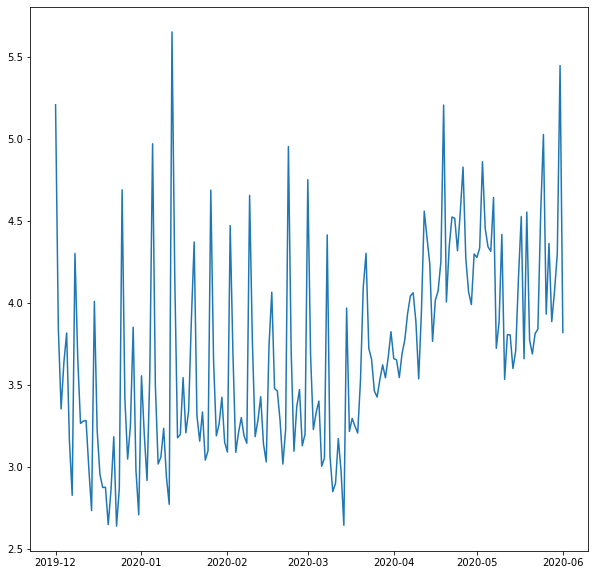

In [129]:
# Average milleage of a trip by day
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(mileage_by_day.Start_date, mileage_by_day.Miles)
# plt.title('The average mileage of a taxi trip (in miles) changed after COVID-19')
plt.show()
# As we can see, an average milage of a trip also increased for about 1 mile

In [45]:
# Now let' explore the trend by hours
# Select the column
rides_by_hour = taxi_2020['Start Time']
# Count 
rides_by_hour = rides_by_hour.value_counts().sort_index().reset_index()
# Rename columns
rides_by_hour = rides_by_hour.rename(columns = {'index': "Time", 'Start Time': 'Rides'})
print(rides_by_hour)

        Time  Rides
0   00:00:00  24005
1   00:15:00  22815
2   00:30:00  20438
3   00:45:00  19012
4   01:00:00  18082
..       ...    ...
91  22:45:00  32365
92  23:00:00  31815
93  23:15:00  29582
94  23:30:00  26903
95  23:45:00  24599

[96 rows x 2 columns]


In [46]:
# Check types of columns
rides_by_hour.dtypes

Time     object
Rides     int64
dtype: object

In [47]:
rides_by_hour['hour'] = pd.to_datetime(rides_by_hour['Time'], format = '%H:%M:%S').dt.hour
rides_by_hour

,Time,Rides,hour
0,00:00:00,24005,0
1,00:15:00,22815,0
2,00:30:00,20438,0
3,00:45:00,19012,0
4,01:00:00,18082,1
...,...,...,...
91,22:45:00,32365,22
92,23:00:00,31815,23
93,23:15:00,29582,23
94,23:30:00,26903,23


In [48]:
rides_by_hour = rides_by_hour.groupby('hour', as_index=False).agg({"Rides": "sum"})
print(rides_by_hour)

    hour   Rides
0      0   86270
1      1   68432
2      2   53376
3      3   42701
4      4   34938
5      5   34592
6      6   55747
7      7  118599
8      8  191586
9      9  216739
10    10  206382
11    11  222586
12    12  243562
13    13  251466
14    14  253326
15    15  260180
16    16  285952
17    17  310775
18    18  299606
19    19  258616
20    20  210621
21    21  173804
22    22  144425
23    23  112899


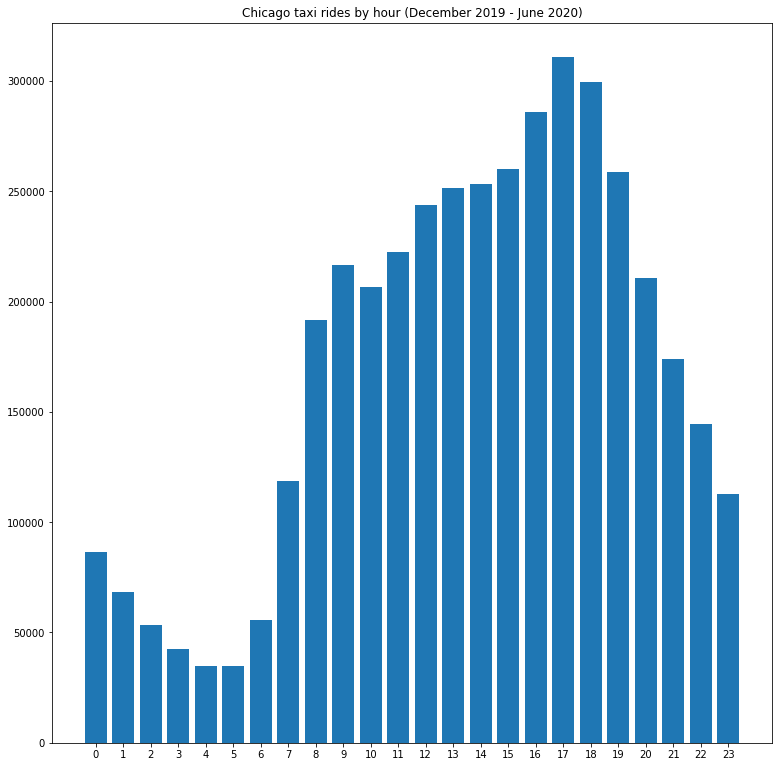

In [49]:
# Now let's create a a barplot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(rides_by_hour.hour, rides_by_hour.Rides)
plt.xticks(rides_by_hour.hour)
plt.title('Chicago taxi rides by hour (December 2019 - June 2020)')
plt.show()

In [61]:
# Now let's compare information from two time periods
# First, I will cut information from December 2019 to March 2020 and from April 2020 to mid-June-2020
taxi1 = taxi_2020[(taxi_2020['Start Date'] > '2019-12-01') & (taxi_2020['Start Date'] <= '2020-03-31')]
taxi2 = taxi_2020[(taxi_2020['Start Date'] > '2020-04-01') & (taxi_2020['Start Date'] <= '2020-06-15')]

In [62]:
# Check data
print(taxi1.head()) # 3976316
print(taxi2.head()) # 124826

                                                 Taxi ID Trip Start Timestamp  \
33571  df20a533d377315e42c36444c2dd760936f6742427dbd8...           2019-12-02   
33572  7bc990a07a5c8b53e6b1e2a92df55a40ac664b828d6f57...           2019-12-02   
33573  9e36bbce1658ed60bd457bb2187c3a1ed4f47714110ac4...           2019-12-02   
33574  0574d247700e50d1fb996084c8b1c649bf57effe419a6d...           2019-12-02   
33575  6bc3520aa3e5055fdd502ad4db2b419e40a2579182d817...           2019-12-02   

       Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
33571 2019-12-02 00:15:00         509.0        4.43         1.703198e+10   
33572 2019-12-02 00:15:00         780.0        2.00         1.703183e+10   
33573 2019-12-02 00:30:00        1920.0       14.40                  NaN   
33574 2019-12-02 00:30:00        1463.0       17.86         1.703198e+10   
33575 2019-12-02 00:15:00         774.0        3.34                  NaN   

       Dropoff Census Tract  Pickup Community Area  Drop

In [69]:
# Now let's do the same in terms of hours for each dataset, we want to compare them.
# Let's explore the information for the first dataset
# Select the column
rides_by_hour1 = taxi1['Start Time']
# Count 
rides_by_hour1 = rides_by_hour1.value_counts().sort_index().reset_index()
# Rename columns
rides_by_hour1 = rides_by_hour1.rename(columns = {'index': "Time", 'Start Time': 'Rides'})
print(rides_by_hour1)

# And do the same for the second dataset
rides_by_hour2 = taxi2['Start Time']
# Count 
rides_by_hour2 = rides_by_hour2.value_counts().sort_index().reset_index()
# Rename columns
rides_by_hour2 = rides_by_hour2.rename(columns = {'index': "Time", 'Start Time': 'Rides'})
print(rides_by_hour2)

        Time  Rides
0   00:00:00  23342
1   00:15:00  21969
2   00:30:00  19670
3   00:45:00  18287
4   01:00:00  17470
..       ...    ...
91  22:45:00  31155
92  23:00:00  30615
93  23:15:00  28519
94  23:30:00  25867
95  23:45:00  23694

[96 rows x 2 columns]
        Time  Rides
0   00:00:00    655
1   00:15:00    496
2   00:30:00    421
3   00:45:00    377
4   01:00:00    300
..       ...    ...
91  22:45:00    795
92  23:00:00    861
93  23:15:00    718
94  23:30:00    687
95  23:45:00    589

[96 rows x 2 columns]


In [71]:
# Now let's create hours
rides_by_hour1['hour'] = pd.to_datetime(rides_by_hour1['Time'], format = '%H:%M:%S').dt.hour
print(rides_by_hour1)

rides_by_hour2['hour'] = pd.to_datetime(rides_by_hour2['Time'], format = '%H:%M:%S').dt.hour
print(rides_by_hour2)

        Time  Rides  hour
0   00:00:00  23342     0
1   00:15:00  21969     0
2   00:30:00  19670     0
3   00:45:00  18287     0
4   01:00:00  17470     1
..       ...    ...   ...
91  22:45:00  31155    22
92  23:00:00  30615    23
93  23:15:00  28519    23
94  23:30:00  25867    23
95  23:45:00  23694    23

[96 rows x 3 columns]
        Time  Rides  hour
0   00:00:00    655     0
1   00:15:00    496     0
2   00:30:00    421     0
3   00:45:00    377     0
4   01:00:00    300     1
..       ...    ...   ...
91  22:45:00    795    22
92  23:00:00    861    23
93  23:15:00    718    23
94  23:30:00    687    23
95  23:45:00    589    23

[96 rows x 3 columns]


In [72]:
# Now let's summarize hours
rides_by_hour1 = rides_by_hour1.groupby('hour', as_index=False).agg({"Rides": "sum"})
print(rides_by_hour1)

rides_by_hour2 = rides_by_hour2.groupby('hour', as_index=False).agg({"Rides": "sum"})
print(rides_by_hour2)

    hour   Rides
0      0   83268
1      1   66048
2      2   51447
3      3   40936
4      4   32916
5      5   32201
6      6   52450
7      7  113786
8      8  185212
9      9  208684
10    10  197006
11    11  212657
12    12  232917
13    13  240367
14    14  241860
15    15  248194
16    16  274248
17    17  299699
18    18  290436
19    19  250774
20    20  204339
21    21  168653
22    22  139523
23    23  108695
    hour  Rides
0      0   1949
1      1   1125
2      2    795
3      3    831
4      4   1292
5      5   1871
6      6   2856
7      7   4119
8      8   5337
9      9   6807
10    10   7961
11    11   8463
12    12   8932
13    13   9161
14    14   9448
15    15   9820
16    16   9531
17    17   8702
18    18   6630
19    19   5280
20    20   4187
21    21   3525
22    22   3349
23    23   2855


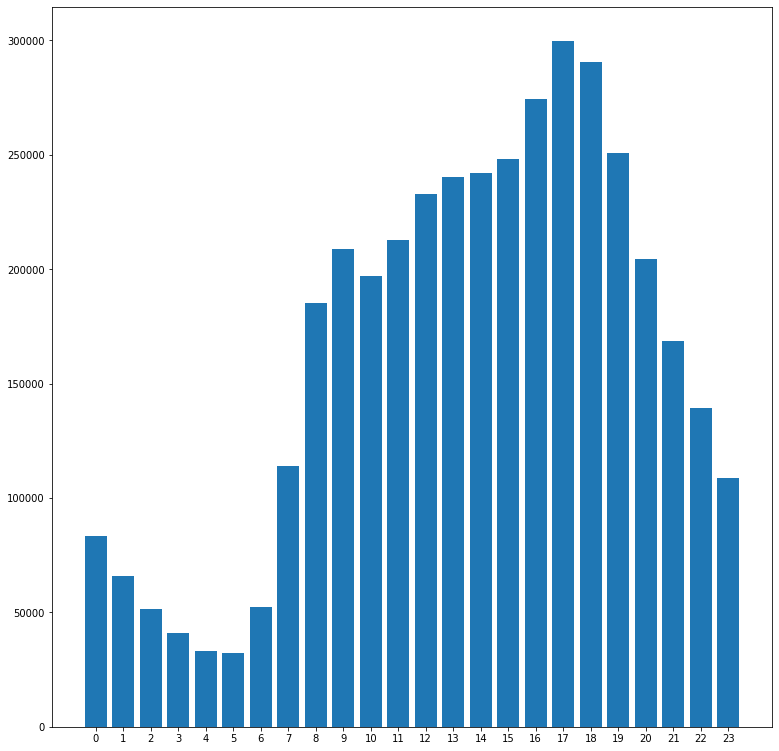

In [132]:
# Now let's create a a barplot for the first dataset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(rides_by_hour1.hour, rides_by_hour1.Rides)
plt.xticks(rides_by_hour1.hour)
# plt.title('Chicago taxi rides by hour (December 2019 - March 2020)')
plt.show()

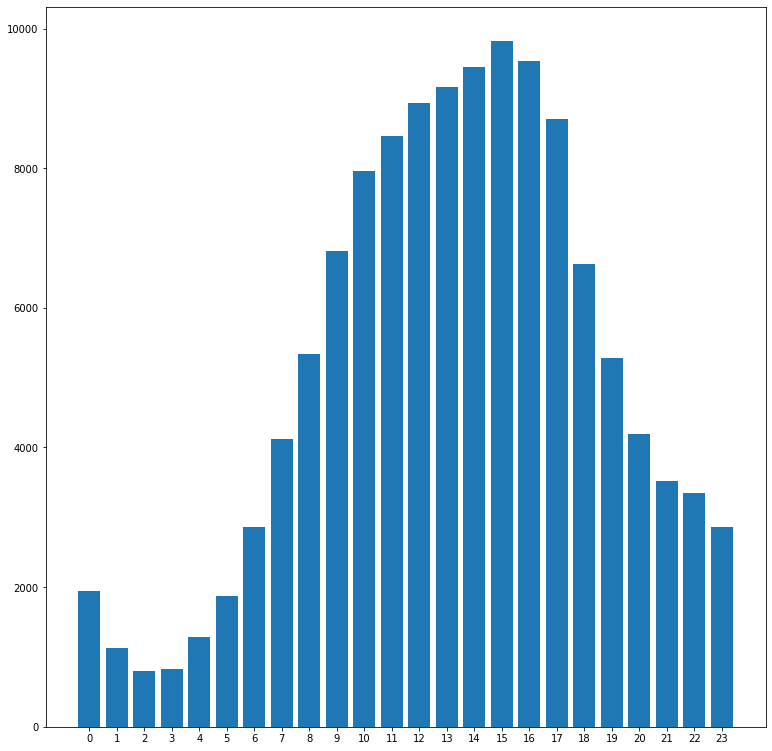

In [133]:
# Now let's create a a barplot for the second dataset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(rides_by_hour2.hour, rides_by_hour2.Rides)
plt.xticks(rides_by_hour2.hour)
# plt.title('Chicago taxi rides by hour (April 2020 - June 2020)')
plt.show()

In [ ]:
# As we can see, the patterns changed too, during COVID-19 the distribution of rides by hour became more condensed. 

### 3. Exploring changes in taxi payments and payment behavior

In [98]:
# Now lets explore how the payment trends changed for taxi drivers due to COVID-19
print(taxi_2020.head())

                                             Taxi ID Trip Start Timestamp  \
0  bbf91e67201de7487dbeb23021a9a741e36d8d65175def...  2019-12-01 00:15:00   
1  b83ba3da1a4bc2a686d885ec2f802c3f256c518d93816c...  2019-12-01 00:15:00   
2  53c01ec83313fee495650d2294b7c88ade2f3d82f3acd0...  2019-12-01 00:15:00   
3  ef5e9c8f0da412a5961a77ad3da965c641e08eb1ddd19f...  2019-12-01 00:15:00   
4  71cf25528ebc98e11ac91a5d359776a91874e7f6047cb8...  2019-12-01 00:15:00   

   Trip End Timestamp  Trip Seconds  Trip Miles  Pickup Census Tract  \
0 2019-12-01 00:30:00         600.0         0.1         1.703184e+10   
1 2019-12-01 00:15:00         180.0         0.0                  NaN   
2 2019-12-01 00:30:00         380.0         1.2                  NaN   
3 2019-12-01 00:30:00         780.0         2.0         1.703184e+10   
4 2019-12-01 00:30:00         720.0         3.1         1.703128e+10   

   Dropoff Census Tract  Pickup Community Area  Dropoff Community Area   Fare  \
0          1.703108e+10

In [100]:
# Select the necessary columns
fares = taxi_2020[['Start Date','Fare']]
print(fares.head())

  Start Date   Fare
0 2019-12-01   8.75
1 2019-12-01   5.00
2 2019-12-01   6.25
3 2019-12-01   9.25
4 2019-12-01  11.50


In [102]:
# Rename start date column
fares = fares.rename(columns = {'Start Date': "Start_date"})
print(fares)

        Start_date   Fare
0       2019-12-01   8.75
1       2019-12-01   5.00
2       2019-12-01   6.25
3       2019-12-01   9.25
4       2019-12-01  11.50
...            ...    ...
4137289 2020-06-01  35.00
4137290 2020-06-01   3.25
4137291 2020-06-01   6.50
4137292 2020-06-01   9.25
4137293 2020-06-01   4.50

[4137294 rows x 2 columns]


In [112]:
# Calculate average check per a ride per day
mean_fare_by_day = fares.groupby('Start_date', as_index=False).agg({"Fare": "mean"}).round(1)
print(mean_fare_by_day)

    Start_date  Fare
0   2019-12-01  21.7
1   2019-12-02  15.2
2   2019-12-03  14.6
3   2019-12-04  16.0
4   2019-12-05  16.5
..         ...   ...
179 2020-05-28  15.3
180 2020-05-29  16.2
181 2020-05-30  18.3
182 2020-05-31  20.0
183 2020-06-01  13.9

[184 rows x 2 columns]


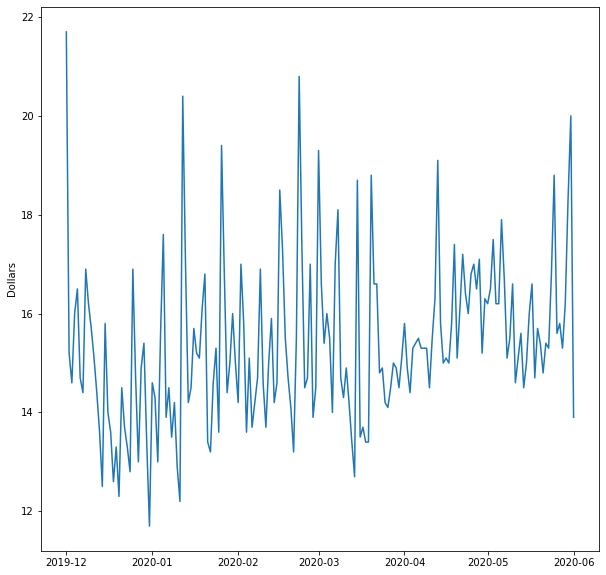

In [135]:
# Plot mean fare by day
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(mean_fare_by_day.Start_date, mean_fare_by_day.Fare)
plt.ylabel('Dollars')
# plt.title('The fare remains more or less the same ($16), but in April it fluctuated much less')
plt.show()

In [115]:
# What was the cululative revenue of fares per day?
sum_fare_by_day = fares.groupby('Start_date', as_index=False).agg({"Fare": "sum"}).round(1)
print(sum_fare_by_day)

    Start_date       Fare
0   2019-12-01   730009.9
1   2019-12-02   804205.0
2   2019-12-03   830246.8
3   2019-12-04   927646.7
4   2019-12-05  1028231.8
..         ...        ...
179 2020-05-28    41502.2
180 2020-05-29    46201.5
181 2020-05-30    43902.8
182 2020-05-31    48646.9
183 2020-06-01      138.8

[184 rows x 2 columns]


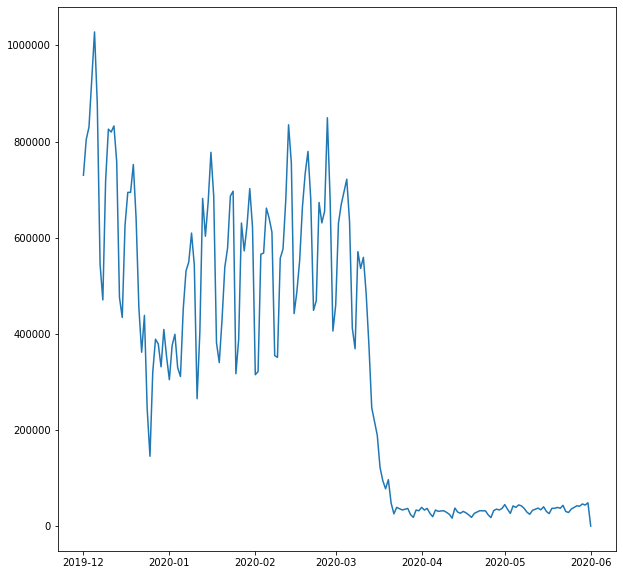

In [131]:
# Plot cumusum fare by day
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(sum_fare_by_day.Start_date, sum_fare_by_day.Fare)
# plt.title('The total daily revelue of Chicago drivers dropped due to COVID-19 \n about 15 times - from 800000 USD to 45000 USD per day')
plt.show()

In [ ]:
# Now let's consider the payments by type
fares = taxi_2020[['Start Date','Fare', '']]
print(fares.head())

In [ ]:
# Plot fares by day
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(taxi_2020_by_day.Start_date, taxi_2020_by_day.Count)
plt.title('The taxi traffic in Chicago drop significantly in the end of March 2020 due to COVID-19')
plt.show()

### 3. Time Series Analysis

In [75]:
# Let's use the same data use used to see the drop of traffic
print(taxi_2020_by_day.head())

   Start_date  Count
0  2019-12-01  33571
1  2019-12-02  52913
2  2019-12-03  56998
3  2019-12-04  58126
4  2019-12-05  62134


In [78]:
# Check the type of columns
taxi_2020_by_day.dtypes

Start_date    object
Count          int64
dtype: object

In [79]:
# Print size
print(taxi_2020_by_day.size)

368


In [80]:
# Descriptive statistics
print(taxi_2020_by_day.describe())

              Count
count    184.000000
mean   22484.673913
std    19593.800836
min       10.000000
25%     2362.000000
50%    21637.500000
75%    41370.250000
max    62134.000000


In [93]:
# Create a lagged feature
data = taxi_2020_by_day['Count']
ts_data = DataFrame(data.values)
# print(temps)
dataframe = concat([ts_data.shift(1), ts_data], axis=1)
# print(dataframe)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

         t    t+1
0      NaN  33571
1  33571.0  52913
2  52913.0  56998
3  56998.0  58126
4  58126.0  62134


In [94]:
# Create lag features with 3 values
ts_data = DataFrame(data.values)
dataframe = concat([ts_data.shift(3), ts_data.shift(2), ts_data.shift(1), ts_data], axis = 1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))

       t-2      t-1        t    t+1
0      NaN      NaN      NaN  33571
1      NaN      NaN  33571.0  52913
2      NaN  33571.0  52913.0  56998
3  33571.0  52913.0  56998.0  58126
4  52913.0  56998.0  58126.0  62134


In [95]:
# Create a rolling mean
ts_data = DataFrame(data.values)
shifted = ts_data.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, ts_data], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)    t+1
0          NaN  33571
1          NaN  52913
2      43242.0  56998
3      54955.5  58126
4      57562.0  62134


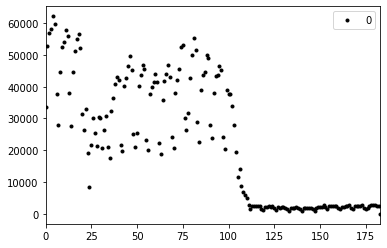

In [97]:
# Visualize
ts_data = DataFrame(data.values)
ts_data.plot(style='k.') # You can remove k. and receive a standard plot
plt.show()

**Additional research information:**

1. How much does a Taxi Driver make in Chicago, IL? The average Taxi Driver salary in Chicago, IL is 38,001 USD as of May 28, 2020, but the range typically falls between 31,564 USD and 46,379 USD. 

2. Chicago, Illinois - 6,650 taxi certificates (medallions)

